# TME2: Prise en main de PIL et Matplotlib

> Consignes: le fichier **TME2_Sujet.ipynb** est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en **TME2_nom1_nom2.ipynb**.
<tt>PIL</tt> (https://pillow.readthedocs.io/en/stable/index.html) est le module qui nous permet de lire, manipuler et écrire des images avec un grand nombre de formats possible. <tt>Matplotlib</tt> permet d'afficher des courbes et des images, il est chargé par l'intermédiaire du meta-module <tt>pylab</tt>. Les deux modules sont importés par la série d'instructions Python suivante:

In [41]:
from PIL import Image
from pylab import *

## Exercice 1 : chargement d'image et visualisation
### 1.1 Voir une image
Écrire un code Python qui charge l'image <tt>img/genies-math.jpg</tt> et l'affiche à l'aide de la commande imshow(). Afficher le mode de cette image.

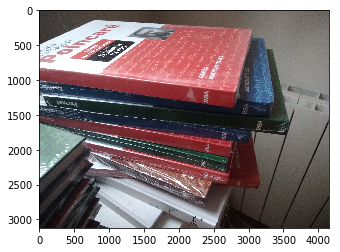

In [42]:
genie = Image.open("img/genies-math.jpg")
imshow(genie)

### 1.2 Conversion de mode
Convertir cette image en image à niveau de gris. Afficher simultanément les deux images couleurs et niveaux de gris,  l'une à droite, l'autre à gauche, sans les axes. Donner un titre à chaque image.

Text(0.5,1,'Image en niveaux de gris')

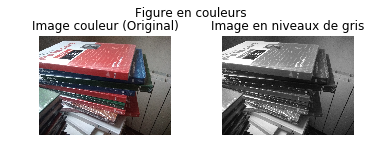

In [43]:
genie_ndg = genie.convert('L')

figure("Affichage des deux images")

suptitle("Figure en couleurs")

subplot(2 ,2 ,1)
axis("off")
imshow(genie)
title("Image couleur (Original)")
        
subplot(2 ,2 ,2)
axis("off")
imshow(genie_ndg)
title("Image en niveaux de gris")

### 1.3 Histogramme
Utiliser la méthode <tt>histogram()</tt> de la classe <tt>Image</tt> pour calculer l'histogramme de l'image en niveau de gris calculée à la question précédente. Afficher l'histogramme sous la forme d'un graphe de bar.

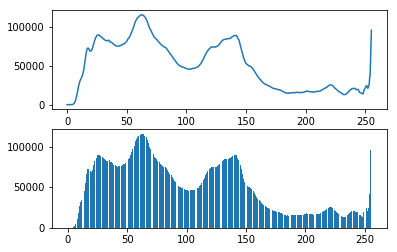

In [44]:
# Création histogramme pour l'image en niveaux de gris
hist = genie_ndg.histogram()

# Affichage de l'histogramme
subplot(2,1,1)
plot(hist)

# pour le fun
subplot(2,1,2)
bar(range(len(hist)),hist)
show()

### 1.4 Égalisation d'histogramme
Utiliser les fonctions <tt>egalisation()</tt> et <tt>applique()</tt> du TME1 pour créer une liste de nouvelle valeurs dont l'histogramme a été égalisée. Puis en faire une nouvelle image PIL. Afficher l'image avant, puis après égalisation. Afficher l'histogramme de l'image égalisée.

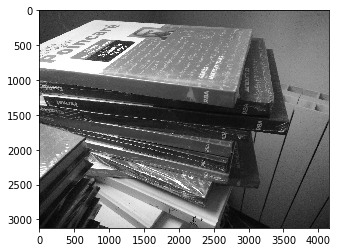

In [55]:
from math import ceil

# Égalisation d'histogramme

def egalisation(hist2):
    """ list[int] -> list[int] """
    table = [0]*len(hist2)
    A = 0
    B = len(hist2)-1
    while hist2[A] == 0:
        A += 1
    while hist2[B] == 0:
        B -= 1
    #print(A,B)
    for i in range(A,B+1):
        table[i] = ceil(((i-A)/(B-A))*255)
    #print("table",table)
    return table

def applique(data,table):
    """ list[int]*list[int] -> list[int] """
    for i in range(len(data)):
        data[i] = table[data[i]]
    return data



# Application à notre image

genie_ndg_eg = Image.new('L',genie_ndg.size)

data = list(genie_ndg.getdata()) #data de genie_ndg_eg

hist_egalise = egalisation(hist)
data_bis = applique(data,hist_egalise)
genie_ndg_eg.putdata(data_bis)


imshow(genie_ndg_eg)



### 1.5 Egalisation d'histogramme (suite)
La classe <tt>ImageOps</tt> du module <tt>PIL</tt> contient une méthode <tt>equalize()</tt> qui égalise l'histogramme d'une image. Utiliser cette méthode et comparer le résultat avec votre propre fonction d'égalisation (comparer aussi les deux histogrammes après égalisation).

Text(0.5,1,'Leur égalisation')

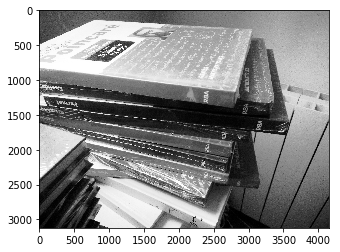

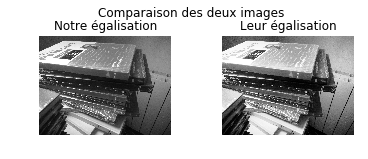

In [56]:
from PIL import ImageOps

genie_ndg_egbis = ImageOps.equalize(genie_ndg, mask=None)
imshow(genie_ndg_egbis)

figure("Comparaison des deux images")

suptitle("Comparaison des deux images")

subplot(2 ,2 ,1)
axis("off")
imshow(genie_ndg_eg)
title("Notre égalisation")
        
subplot(2 ,2 ,2)
axis("off")
imshow(genie_ndg_egbis)
title("Leur égalisation")


Les deux images ne sont pas les mêmes,les deux égalisations sont différentes. Affichons les deux histogrammes.



In [65]:
# Notre histogramme égalisé:

print("NOTRE HISTOGRAMME ÉGALISÉ")
print("Taille:",len(data))

print("LEUR HISTOGRAMME ÉGALISÉ")
print("Taille:",len(list(genie_ndg_egbis.getdata())))

print("Les deux histogrammes sont les mêmes: ", data==list(genie_ndg_egbis.getdata()))

NOTRE HISTOGRAMME ÉGALISÉ
Taille: 12979200
LEUR HISTOGRAMME ÉGALISÉ
Taille: 12979200
Les deux histogrammes sont les mêmes:  False


## Exercice 2 : parcours d'image et calcul de statistiques
### 2.1 Calcul des extrema de l'image par parcours
Écrire une fonction <tt>extrema()</tt> qui prend une image PIL, la parcours pixel par pixel, à l'aide de classe <tt>PyAcess</tt> (ou une des autres méthodes vues en cours) et retourne ses valeurs minimale et maximale.


In [67]:
def extrema(img):
    
    data = list(img.getdata())
    my_min = data[0]
    my_max = data[0]
    
    for i in range(len(data)):
        if data[i] < my_min:
            my_min = data[i]
        if data[i] > my_max:
            my_max = data[i]
    return my_min, my_max
       

### 2.2 Application et temps de calcul
Appliquer la fonction <tt>extrema()</tt> à l'image <tt>img/genies-math.jpg</tt>, convertie en niveau de gris. Comparer le temps d'exécution avec la méthode <tt>getextrema()</tt> de la classe Image. Pour comparer les temps d'exécution, on peut utiliser les deux fonctions <tt>tic()</tt> et <tt>tac()</tt>: la première démarre un chronomètre, la seconde affiche le temps écoulés depuis le dernier appel de l'un des deux fonctions. Quelle est la taille de cette image ? Comment expliquer ces différences de temps d'exécution ?

In [74]:
from time import process_time
mytime = 0
def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()


print("Temps d'exécution de notre fonction extrema():")
tic()
extrema(genie_ndg)
tac()

print("Temps d'exécution de notre getextrema():")
tic()
genie_ndg.getextrema()
tac()

Temps d'exécution de notre fonction extrema():
1.0969545529999962
Temps d'exécution de notre getextrema():
0.01064671900000036


La différence en temps d'exécution s'explique par le fait que notre fonction _extrema()_ se base sur des boucles écrites en Python alors que la fonction _getextrema()_ est écrite en C (bas niveau).

## Exercice 3: sur la couleur
### 3.1 séparation de canaux
Écrire un code Python qui charge l'image <tt>mandrill.png</tt>. Vérifier, à l'aide d'un test de son mode est bien <tt>RGB</tt>.
Séparer les 3 canaux à l'aide de la méthode <tt>split()</tt> de la classe <tt>Image</tt>. On peut aussi, de façon alternative, utiliser la méthode <tt>getchannel()</tt>

In [101]:
img2 = Image.open("img/mandrill.png")

# Vérification mode:
print("Le mode de mandrill.png est RGB: ", img2.mode == 'RGB')

# Séparation canaux:
r, g, b = img2.split()

r.show()
g.show()
b.show()


Le mode de mandrill.png est RGB:  True


### 3.2 échange de canaux
Créer une nouvelle image <tt>RGB</tt> dans laquelle on a échanger les canaux rouge et bleu. Afficher cette nouvelle image. On pourrat utilise la méthode <tt>merge()</tt> de la classe <tt>Image</tt>. Visualiser la nouvelle image. Essayer différente combinaison de canaux.

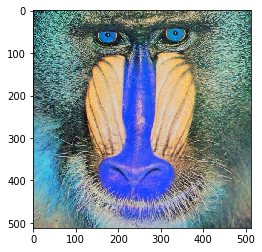

In [102]:
imshow(img2)

img2_bis = img2.copy()

# Echange des canaux rouge et bleu
img2_bis = Image.merge(img2.mode, (b, g, r))
imshow(img2_bis)

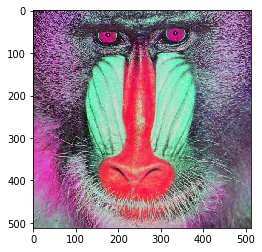

In [103]:
# Echange des canaux vert et bleu
img2_bis = Image.merge(img2.mode, (r, b, g))
imshow(img2_bis)


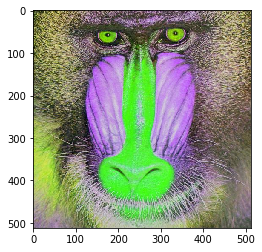

In [104]:
# Echange des canaux vert et rouge
img2_bis = Image.merge(img2.mode, (g, r, b))
imshow(img2_bis)

### 3.3 Canaux séparés dans leur couleur
Écrire un code Python qui créée une image montrant le canal rouge en niveau de rouge. 
Faire de même pour les deux autres canaux.

Text(0.5,1,'Vert')

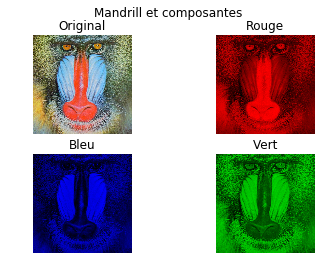

In [133]:
# Création d'une image montrant le canal rouge en niveaux de rouge

def imRouge(img):
    r, g, b = img.split() #r, g, b de type PIL.Image.Image
    img_r = Image.new("RGB", img.size)
    r0, g0, b0 = img_r.split()
    img_r = Image.merge(img.mode, (r, g0, b0))
    return img_r

# Création d'une image montrant le canal rouge en niveaux de rouge

def imVert(img):
    r, g, b = img.split() #r, g, b de type PIL.Image.Image
    img_g = Image.new("RGB", img.size)
    r0, g0, b0 = img_g.split()
    img_g = Image.merge(img.mode, (r0, g, b0))
    return img_g

# Création d'une image montrant le canal rouge en niveaux de rouge

def imBleu(img):
    r, g, b = img.split() #r, g, b de type PIL.Image.Image
    img_b = Image.new("RGB", img.size)
    r0, g0, b0 = img_b.split()
    img_b = Image.merge(img.mode, (r0, g0, b))
    return img_b


figure("Figure composée")
suptitle ("Mandrill et composantes")

subplot (2 ,2 ,1)
axis("off")
imshow(img2)
title("Original")

subplot (2 ,2 ,2)
axis("off")
imshow(imRouge(img2))
title("Rouge")

subplot (2 ,2 ,3)
axis("off")
imshow(imBleu(img2))
title("Bleu")

subplot (2 ,2 ,4)
axis("off")
imshow(imVert(img2))
title("Vert")

## Exercice 4: avec image codée sur deux octets et ou virgule flottante
### 4.1 Image codée sur 2 octets
Charger l'image <tt>img/CT-scan.png</tt> et afficher les extremas de cette image. Cette image est issue d'une acquisition IRM, chaque valeur . Afficher l'image telle quelle et commenter. Quel opération faut-il faire pour voir tous les détails? Réaliser cette opération et afficher l'image transformée.

min = 0 , max =  2244


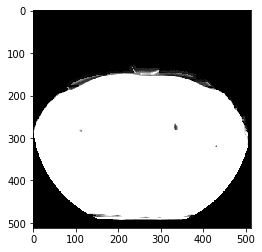

In [136]:
img3 = Image.open("img/CT-scan.png")

min3, max3 = img3.getextrema()
print("min =", min3, ", max = ", max3)

imshow(img3)


On ramène les valeurs des pixels à des valeurs comprises entre 0 et 255 pour avoir une image en niveaux de gris.

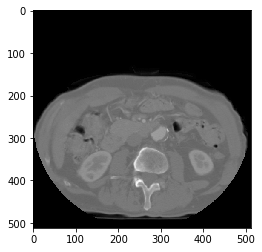

In [146]:
data3 = list(img3.getdata())
for i in range(len(data3)):
    data3[i] = (1.)*data3[i]*255/max3
    
img3_bis = Image.new('L', img3.size)
img3_bis.putdata(data3)

imshow(img3_bis)

### 4.2 Image codée en virgule flottante

Même question avec l'image <tt>img/sst.tif</tt> qui est codée en virgule flottante et réprésente une image satellite de température de surface de l'Océan Atlantique. Afficher son mode.


min = 0.0 , max =  27.25580596923828


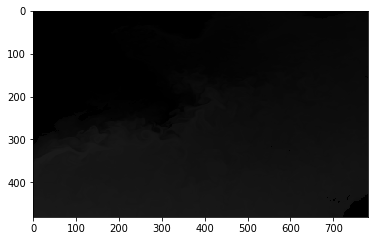

In [147]:
img4 = Image.open("img/sst.tif")

min4, max4 = img4.getextrema()
print("min =", min4, ", max = ", max4)

imshow(img4)

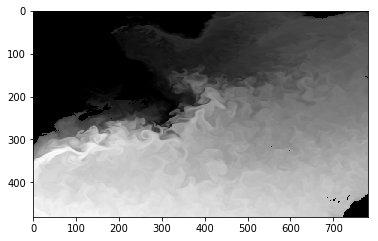

In [148]:
data4 = list(img4.getdata())
for i in range(len(data4)):
    data4[i] = (1.)*data4[i]*255/max4
    
img4_bis = Image.new('L', img4.size)
img4_bis.putdata(data4)

imshow(img4_bis)